In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
#%matplotlib inline
%matplotlib qt 

exp = np.exp
ln, lg = np.log, np.log10
pi = np.pi
cos, sin, tan = np.cos, np.sin, np.tan
arccos, arcsin, arctan = np.arccos, np.arcsin, np.arctan

lgT = [2.98817979 3.03066043 3.06935354 3.10487957 3.13771798]
lgt = [5.         4.         3.0211893  2.30103    1.17609126]
1/T = [0.00102759 0.00093184 0.00085241 0.00078545 0.00072825]
lnt = [11.51292546  9.21034037  6.95654544  5.29831737  2.7080502 ]


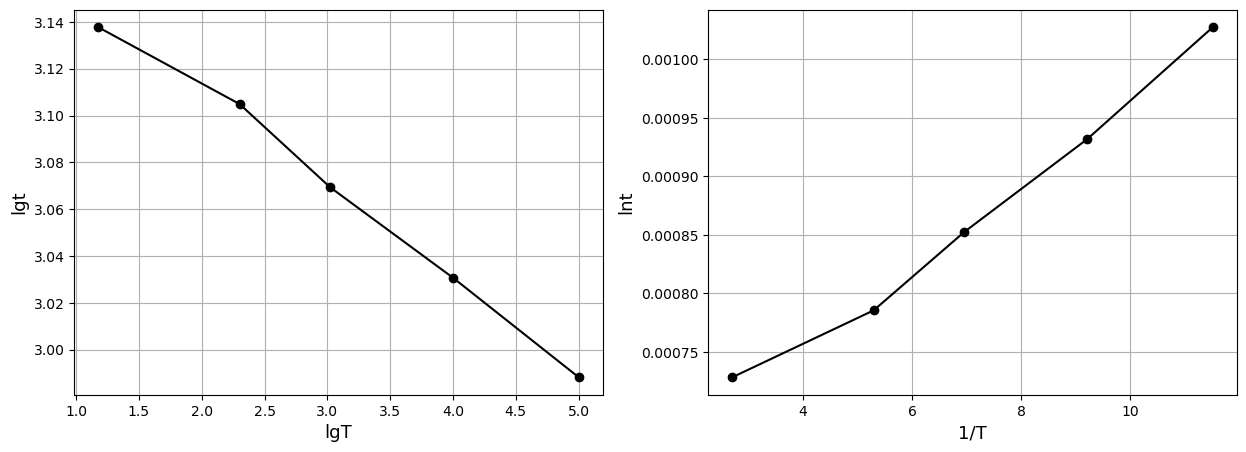

In [7]:
# 摄氏温度数组
T = np.array([700, 800, 900, 1000, 1100])
# 开尔文温度
T = T + 273.15 

# 蠕变断裂时间
t = np.array([100000, 10000, 1050, 200, 15])

lgT = lg(T)
lgt = lg(t)
lnt = ln(t)

print(f'lgT = {lgT}')
print(f'lgt = {lgt}')
print(f'1/T = {1/T}')
print(f'lnt = {lnt}')

%matplotlib inline
#%matplotlib qt 

plt.figure(figsize=(15,5))  

ax1=plt.subplot(1, 2, 1) # the 3rd number specifies which of the subplots to plot
plt.plot(lgt,lgT,'ko-')
plt.xlabel('lgT', fontsize=13)
plt.ylabel('lgt', fontsize=13)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)
plt.grid()

ax2=plt.subplot(1, 2, 2)
plt.plot(lnt,1/T,'ko-')
plt.xlabel('1/T', fontsize=13)
plt.ylabel('lnt', fontsize=13)
plt.xticks(fontsize=10)  # x 轴刻度标签字体大小
plt.yticks(fontsize=10)  # y 轴刻度标签字体大小
plt.grid()

In [79]:
# lg - lg 线性插值
f1 = interp1d(lgT, lgt, kind='linear')
lgT_new = lg(np.array([750, 850]) + 273.15)
lgt_new = f1(lgT_new) 
t_new = 10**lgt_new
print(t_new)

[30745.24508603  3160.07550598]


In [81]:
# ln - 1/T线性插值
f2 = interp1d(1/T, lnt, kind='linear')
x_new = 1 / (np.array([750, 850]) + 273.15)
lnt_new = f2(x_new)
t_new = exp(lnt_new)
print(t_new)

[29892.7352047   3081.82144448]


In [83]:
# lg - lg 线性回归计算
from scipy import stats

k, b, r_value, p_value, std_err = stats.linregress(lgT, lgt)
lgt_ = k * (lg(np.array([750, 850])+273.15)) + b
t_ = 10**lgt_
print(t_)

[31908.21351765  3106.9176343 ]


In [85]:
# ln - 1/T 线性回归计算
from scipy import stats

k, b, r_value, p_value, std_err = stats.linregress(1/T, lnt)
lnt_ = k * (1 / (np.array([750, 850]) + 273.15)) + b
t_ = exp(lnt_)
print(t_)

[31202.03495833  2589.6906    ]
